# Economic indicator analysis

**The objective of economic data analysis is to explore how the economic indicators affect the monthly average house price per saleable area in Hong Kong.**

Data Source:
1. Transaction records - Centaline Property
3. Macroeconomic indicators - Census and statistics department

**Import libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import data**

In [5]:
# For google drive

#from google.colab import drive
#from google.colab import files

#drive.mount('/content/drive')
#data_dir = "/content/drive/My Drive/FYP/centaline/"

In [9]:
# For local directory
data_dir = "../../database_real/macroeconomic_data/centaline/"

In [10]:
hk = ["Kennedy_town_sai_ying_pun", "South_horizon", "Bel_air_sasson", "Aberdeen_ap_lei_chau", "Mid_level_west", "Peak_south",
             "Wanchai_causeway_bay", "Mid_level_central", "Happy_valley_mid_level_east", "Mid_level_north_point", "North_point_fortress_hill", 
             "Quarry_bay_kornhill", "Taikoo_shing", "Shau_kei_wan_chai_wan", "Heng_fa_chuen", "Sheung_wan_central_admiralty"]

kowloon = ["Olympic_station", "Kowloon_station", "Mongkok_yaumatei", "Tsimshatsui_jordan", "Ho_man_tin_kings_park", "To_kwa_wan", 
                  "Whampoa_laguna_verde", "Tseung_kwan_o", "Meifoo_wonderland", "Cheung_sha_wan_west", "Cheung_sha_wan_sham_shui_po", 
                  "Yau_yat_tsuen_shek_kip_mei", "Kowloon_tong_beacon_hill", "Lam_tin_yau_tong", "Kowloon_bay_ngau_chi_wan", "Kwun_tong", 
                  "Diamond_hill_wong_tai_sin", "To_kwa_wan_east", "Hung_hum", "Kai_tak"]

new_east = ["Sai_kung", "Tai_wai", "Shatin", "Fotan_shatin_mid_level_kau_to_shan", "Ma_on_shan", "Tai_po_mid_level_hong_lok_yuen", 
                   "Tai_po_market_tai_wo", "Sheung_shui_fanling_kwu_tung"]

new_west = ["Discovery_bay", "Fairview_park_palm_spring_the_vineyard", "Yuen_long", "Tuen_mun", "Tin_shui_wai", "Tsuen_wan", "Kwai_chung", 
                   "Tsing_yi", "Ma_wan_park_island","Tung_chung_islands", "Sham_tseng_castle_peak_road", "Belvedere_garden_castle_peak_road"]

In [11]:
# Data directory
dir_hk = "./hk_island/"
dir_kowloon = "./kowloon/"
dir_new_east = "./new_east/"
dir_new_west = "./new_west/"

def get_data_by_district(district_name, disctrict_dir):

  district_df = pd.DataFrame()
  for region in district_name:
    new_df = pd.read_csv(data_dir+disctrict_dir+region+".csv")
    new_df["District"] = region
    district_df = pd.concat([district_df, new_df], axis=0)

  # Data cleaning
  district_df['SaleableArea'] = district_df['SaleableArea'].replace("-", np.nan)
  district_df['SaleableArea'] = pd.to_numeric(district_df['SaleableArea']) 
  district_df['UnitPricePerSaleableArea'] = district_df['UnitPricePerSaleableArea'].replace("-", np.nan)
  district_df['UnitPricePerSaleableArea'] = pd.to_numeric(district_df['UnitPricePerSaleableArea']) 
  district_df['UnitPricePerGrossArea'] = district_df['UnitPricePerGrossArea'].replace("-", np.nan)
  district_df['UnitPricePerGrossArea'] = pd.to_numeric(district_df['UnitPricePerGrossArea']) 
  district_df['GrossArea'] = district_df['GrossArea'].replace("-", np.nan)
  district_df['GrossArea'] = pd.to_numeric(district_df['GrossArea']) 
  district_df['LastHold'] = district_df['LastHold'].replace("-", np.nan)
  district_df['LastHold'] = pd.to_numeric(district_df['LastHold']) 
  district_df['GainLoss'] = district_df['GainLoss'].replace("-", np.nan)
  district_df['GainLoss'] = pd.to_numeric(district_df['GainLoss']) 

  district_df = district_df.drop(district_df.columns[0], axis=1)
  district_df['RegDate'] = pd.to_datetime(district_df['RegDate'])
  district_df.sort_values(by=['RegDate'], inplace=True, ascending=False)

  district_df = district_df.reset_index()
  district_df = district_df.drop(['index'], axis=1)
  return district_df

def download_data(filename, download_data):
  dataFrame = pd.DataFrame(data=download_data)
  dataFrame.to_csv(filename)
  files.download(filename)

# Get data by distirct
data_df_hk = get_data_by_district(hk, dir_hk)
data_df_kowloon = get_data_by_district(kowloon, dir_kowloon)
data_df_new_east = get_data_by_district(new_east, dir_new_east)
data_df_new_west = get_data_by_district(new_west, dir_new_west)

# Get all district data
data_df_all = pd.concat([data_df_hk, data_df_kowloon, data_df_new_east, data_df_new_west], axis=0)
data_df_all.sort_values(by=['RegDate'], inplace=True, ascending=False)
data_df_all = data_df_all.reset_index()
data_df_all = data_df_all.drop(['index'], axis=1)
data_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251660 entries, 0 to 251659
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Address                   251660 non-null  object        
 1   BuildingAge               251660 non-null  int64         
 2   RegDate                   251660 non-null  datetime64[ns]
 3   Price                     251660 non-null  float64       
 4   SaleableArea              227968 non-null  float64       
 5   GrossArea                 132535 non-null  float64       
 6   UnitPricePerSaleableArea  227967 non-null  float64       
 7   UnitPricePerGrossArea     132535 non-null  float64       
 8   LastHold                  120840 non-null  float64       
 9   GainLoss                  120840 non-null  float64       
 10  District                  251660 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usag

**Unit price for saleable area distribution**

count    227967.000000
mean      15324.452842
std        6105.796666
min        1476.000000
25%       11594.000000
50%       14618.000000
75%       17802.000000
max      484585.000000
Name: UnitPricePerSaleableArea, dtype: float64


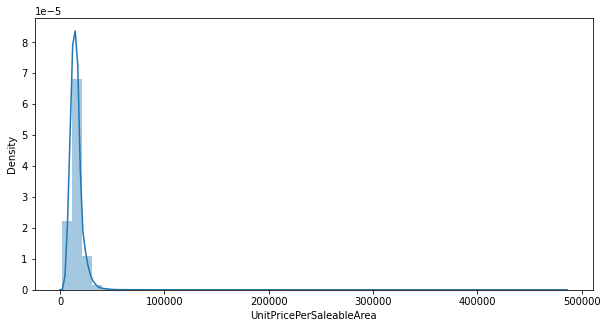

In [12]:
# Distribution
print(data_df_all['UnitPricePerSaleableArea'].describe())

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(data_df_all['UnitPricePerSaleableArea'].dropna());

**Data Preprocessing**

In [13]:
# Data preprocessing
processed_df = data_df_all.copy()

# Add new features
processed_df['month'] = pd.to_datetime(processed_df['RegDate']).dt.month
processed_df['year'] = pd.to_datetime(processed_df['RegDate']).dt.year

# Drop unnecessary columns
processed_df = processed_df.drop(['Address', 'BuildingAge', 'LastHold', 'GainLoss', 'District', 'RegDate', 'Price', 'SaleableArea', 'GrossArea', 'UnitPricePerGrossArea'], axis=1)

# Handling missinig values
# Fill with mean
unitSaleableArea_mean = processed_df['UnitPricePerSaleableArea'].mean()
processed_df['UnitPricePerSaleableArea'] = processed_df['UnitPricePerSaleableArea'].fillna(unitSaleableArea_mean)

**Calculate monthly average unit price for saleable area**

In [15]:
monthly_df = processed_df.copy()
monthly_df = monthly_df.groupby(['year','month'],as_index=False).mean()
monthly_df = monthly_df.rename(columns={'UnitPricePerSaleableArea': 'AveragePricePerSaleableArea'})
monthly_df.head(50)

,year,month,AveragePricePerSaleableArea
0,2017,1,13495.170159
1,2017,2,13504.139043
2,2017,3,13429.026810
3,2017,4,14764.873467
4,2017,5,13969.317035
5,2017,6,14912.611662
6,2017,7,14216.623798
7,2017,8,14321.625345
8,2017,9,14416.688861
9,2017,10,14116.148171


**Monthly average price for saleable area distribution**

count       48.000000
mean     15299.247059
std        790.124519
min      13429.026810
25%      14901.058708
50%      15462.212889
75%      15693.370515
max      17135.004160
Name: AveragePricePerSaleableArea, dtype: float64


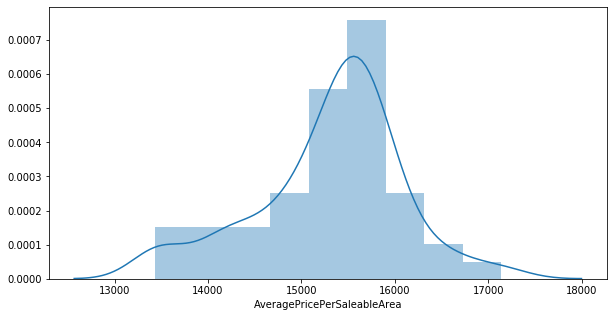

In [18]:
# Distribution
print(monthly_df['AveragePricePerSaleableArea'].describe())

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(monthly_df['AveragePricePerSaleableArea']);

**Import economic indicators and join with original dataframe**

In [19]:
new_monthly_df = monthly_df.copy()

conditions_year = [
  (new_monthly_df['year'] == 2017), (new_monthly_df['year'] == 2018),
  (new_monthly_df['year'] == 2019) 
]

conditions_half = [
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 7), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 7), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 7), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 7)
]

conditions_quarter = [
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 10), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 10), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 10), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 10)
]

conditions_month = [
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 11), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 12),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 11), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 12),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 11), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 12),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 11)
]

In [20]:
# Data directory
file_dir = "../determinants/"

district_df = pd.DataFrame()

population_df = pd.read_csv(data_dir+file_dir+"TABLE001.csv")
unemployment_rate_df = pd.read_csv(data_dir+file_dir+"TABLE006.csv")
export_import_df = pd.read_csv(data_dir+file_dir+"TABLE055.csv")
gdp_df = pd.read_csv(data_dir+file_dir+"TABLE030.csv")
consumer_price_indices_df = pd.read_csv(data_dir+file_dir+"TABLE052.csv")

value_population = population_df['Number_000'].tolist()
value_unemployment_adjusted = unemployment_rate_df['Unemployment_rate_seasonally_adjusted'].tolist()
value_unemployment_not_adjusted = unemployment_rate_df['Unemployment_rate_not_adjusted'].tolist()
value_import = export_import_df['Imports'].tolist()
value_export = export_import_df['Total_exports'].tolist()
value_gdp = gdp_df['GDP_current_market_prices'].tolist()
value_gdp_per_capita = gdp_df['Per_capita_GDP_current_market_prices'].tolist()
value_gdp = gdp_df['GDP_current_market_prices'].tolist()
value_gdp_per_capita = gdp_df['Per_capita_GDP_current_market_prices'].tolist()
value_consumer_price_indices = consumer_price_indices_df['Composite_Consumer_Price_Index'].tolist()

new_monthly_df['Population'] = np.select(conditions_half, value_population) 
new_monthly_df['Unemployment_adjusted'] = np.select(conditions_month[:46], value_unemployment_adjusted) 
new_monthly_df['Unemployment_not_adjusted'] = np.select(conditions_month[:46], value_unemployment_not_adjusted)
new_monthly_df['Imports'] = np.select(conditions_month, value_import) 
new_monthly_df['Total_exports'] = np.select(conditions_month, value_export)
new_monthly_df['GDP'] = np.select(conditions_quarter, value_gdp[3:])
#new_monthly_df['GDP_per_capita'] = np.select(conditions_year, value_gdp_per_capita[:3])
new_monthly_df['CCP_index'] = np.select(conditions_month, value_consumer_price_indices)

new_monthly_df['GDP'] = new_monthly_df['GDP'].str.replace(',', '').astype(float)
#new_monthly_df['GDP_per_capita'] = new_monthly_df['GDP_per_capita'].str.replace(',', '').astype(float)

new_monthly_df.head()

df = new_monthly_df.copy()
df = df[(df['year'] <= 2020) & (df['month'] < 7)]

df.head()

,year,month,AveragePricePerSaleableArea,Population,Unemployment_adjusted,Unemployment_not_adjusted,Imports,Total_exports,GDP,CCP_index
0,2017,1,13495.170159,7391.7,3.3,3.1,308643,296299,631418.0,103.8
1,2017,2,13504.139043,7391.7,3.3,3.2,297978,241707,631418.0,103.7
2,2017,3,13429.026810,7391.7,3.2,3.2,364163,321895,631418.0,103.9
3,2017,4,14764.873467,7391.7,3.2,3.2,339520,305389,628277.0,104.5
4,2017,5,13969.317035,7391.7,3.1,3.2,338753,303105,628277.0,104.3


**Univariate analysis**

In [21]:
def univariate_analysis(feature_name):
    # Statistical summary
    print(df[feature_name].describe())

    # Histogram
    plt.figure(figsize=(8,4))
    sns.distplot(df[feature_name], axlabel=feature_name);

count        24.000000
mean     347658.166667
std       39371.886164
min      277108.000000
25%      325666.500000
50%      357481.500000
75%      377706.500000
max      403236.000000
Name: Imports, dtype: float64


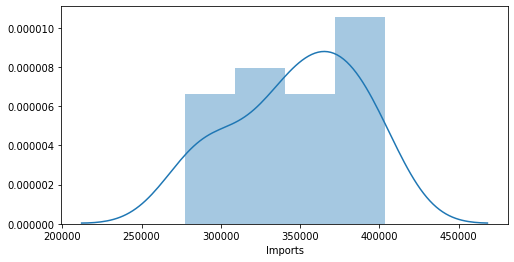

In [22]:
univariate_analysis('Imports')

**Bivariate analysis**

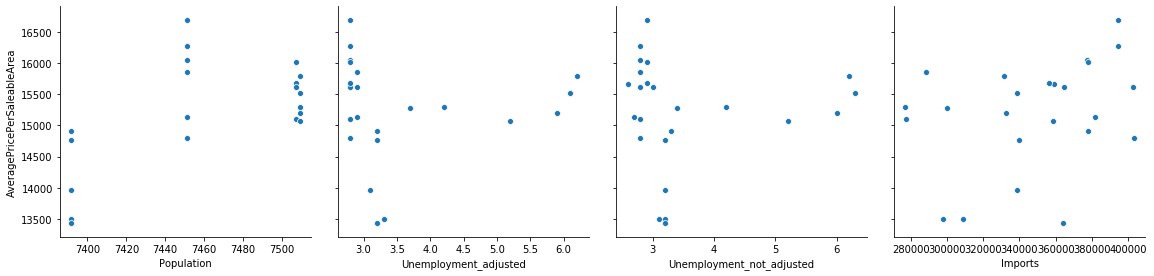

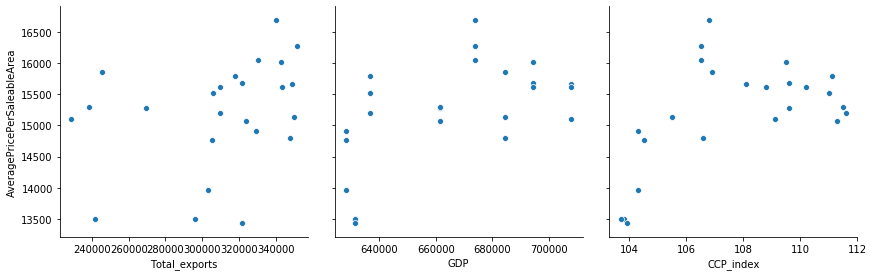

In [23]:
for i in range(3, len(df.columns), 4):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+4],
                y_vars=['AveragePricePerSaleableArea'],
                size=4)

In [24]:
def graphWithTrendLine(var):
    x = df[var]
    y = df['AveragePricePerSaleableArea']

    plt.scatter(x, y)
    plt.xticks(rotation=45)
    fig = sns.regplot(x=var, y="AveragePricePerSaleableArea", data=df)

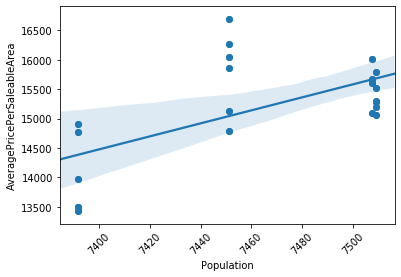

In [25]:
graphWithTrendLine("Population")

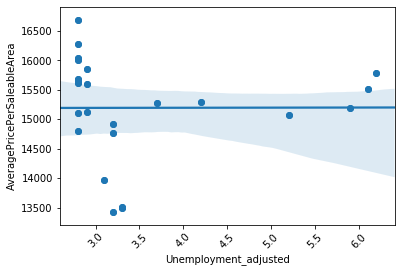

In [26]:
graphWithTrendLine("Unemployment_adjusted")

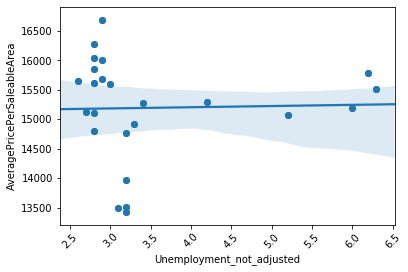

In [27]:
graphWithTrendLine("Unemployment_not_adjusted")

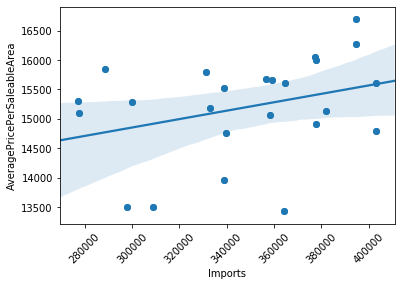

In [28]:
graphWithTrendLine("Imports")

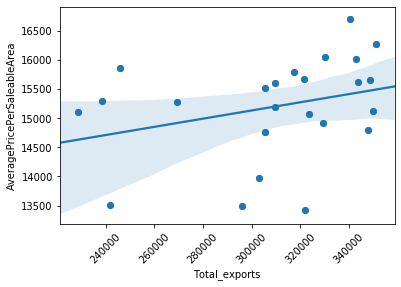

In [29]:
graphWithTrendLine("Total_exports")

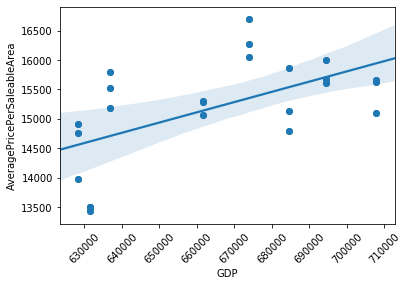

In [30]:
graphWithTrendLine("GDP")

In [33]:
#graphWithTrendLine("GDP_per_capita")

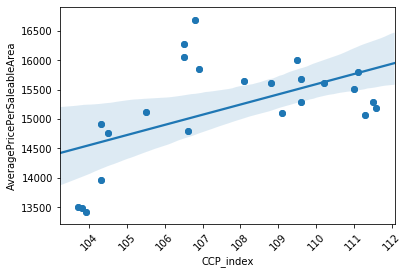

In [32]:
graphWithTrendLine("CCP_index")

**Correlation Matrix and Heatmap**

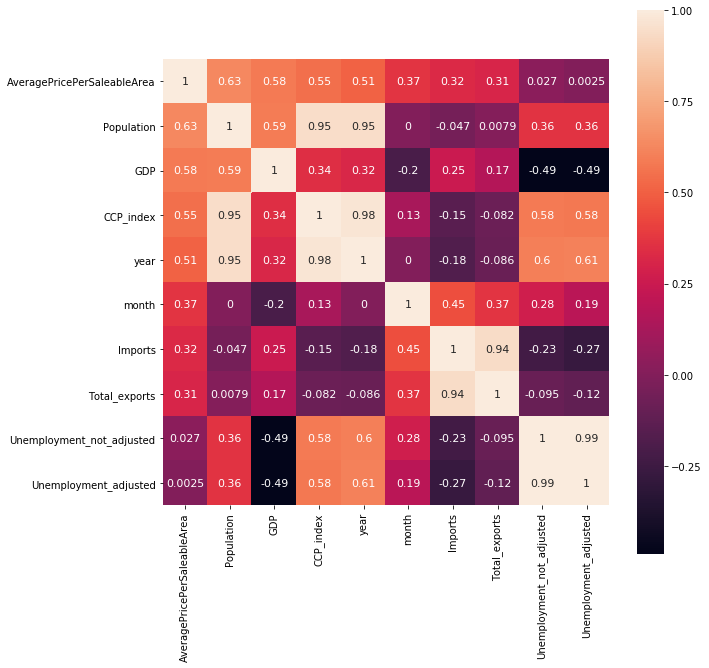

In [13]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
cols = df.corr().sort_values('AveragePricePerSaleableArea', ascending=False).index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, annot=True, square=True, annot_kws={'size':11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()